In [93]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
# load dataset
df = pd.read_csv(r"C:\\Users\\arman\\Desktop\\Machine Learning\\ML\\Data Frame\\train.csv")
df.shape

(1460, 81)

In [95]:
cat_vars = df.select_dtypes(include='object')
cat_vars.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [96]:
miss_val_per = cat_vars.isnull().mean()*100
miss_val_per

MSZoning          0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType       59.726027
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinType2      2.602740
Heating           0.000000
HeatingQC         0.000000
CentralAir        0.000000
Electrical        0.068493
KitchenQual       0.000000
Functional        0.000000
FireplaceQu      47.260274
GarageType        5.547945
GarageFinish      5.547945
GarageQual        5.547945
GarageCond        5.547945
P

In [97]:
# Missing values to greater then 20.

drop_vars = ['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']
cat_vars.drop(columns=drop_vars, axis=1, inplace=True)
cat_vars.shape

(1460, 37)

In [98]:
# Missing values to less then 20.

isnull_per=cat_vars.isnull().mean()*100
miss_vars = isnull_per[isnull_per >0].keys()
miss_vars

Index(['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'],
      dtype='object')

In [99]:
cat_vars['BsmtQual'].fillna('Missing')

0       Gd
1       Gd
2       Gd
3       TA
4       Gd
        ..
1455    Gd
1456    Gd
1457    TA
1458    TA
1459    TA
Name: BsmtQual, Length: 1460, dtype: object

In [100]:
cat_vars['BsmtQual'].mode()

0    TA
Name: BsmtQual, dtype: object

In [101]:
cat_vars['BsmtQual'].fillna(cat_vars['BsmtQual'].mode()[0]).value_counts

<bound method IndexOpsMixin.value_counts of 0       Gd
1       Gd
2       Gd
3       TA
4       Gd
        ..
1455    Gd
1456    Gd
1457    TA
1458    TA
1459    TA
Name: BsmtQual, Length: 1460, dtype: object>

In [102]:
cat_vars_copy= cat_vars.copy()

for var in miss_vars:
    cat_vars_copy[var].fillna(cat_vars[var].mode()[0],inplace=True)
    print(var,"=",cat_vars[var].mode()[0])

BsmtQual = TA
BsmtCond = TA
BsmtExposure = No
BsmtFinType1 = Unf
BsmtFinType2 = Unf
Electrical = SBrkr
GarageType = Attchd
GarageFinish = Unf
GarageQual = TA
GarageCond = TA


C:\Users\arman\AppData\Local\Temp\ipykernel_11856\1757195490.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cat_vars_copy[var].fillna(cat_vars[var].mode()[0],inplace=True)


In [103]:
cat_vars_copy.isnull().sum().sum()

0

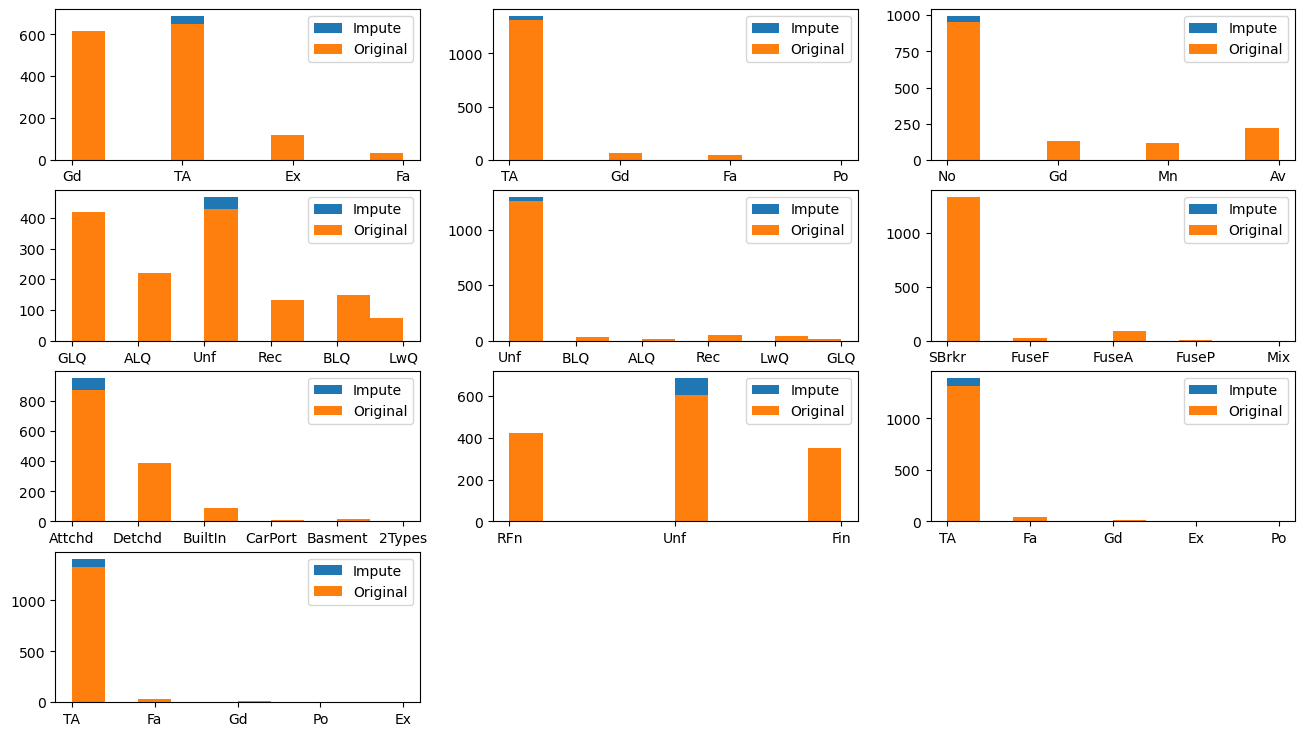

In [104]:
plt.figure(figsize=(16,9))
for i,var in enumerate(miss_vars):
    plt.subplot(4,3,i+1)
    plt.hist(cat_vars_copy[var],label="Impute")
    plt.hist(cat_vars[var].dropna(),label="Original")
    plt.legend()

In [105]:
df.update(cat_vars_copy)
df.drop(columns=drop_vars,inplace=True)

In [106]:
df.select_dtypes(include='object').isnull().sum()

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64